#Exploring the data: Univariate

After defining the research question, your next step toward building a model is to get to know the individual variables through inspection of the data file itself, visualizations and univariate descriptive statistics ("univariate" means pertaining to one variable, rather than many). You’ll want to answer questions such as:

    How many variables do I have?
    How many datapoints?
    Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
    Do any of my variables have a known probability distribution (normal, Poisson, Gamma, etc)?
    Do I have missing data? If so, how much?
    How much variance is there in each of my variables? If you’ve cleaned this dataset yourself, you’ll probably already know the answers to most of these questions.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


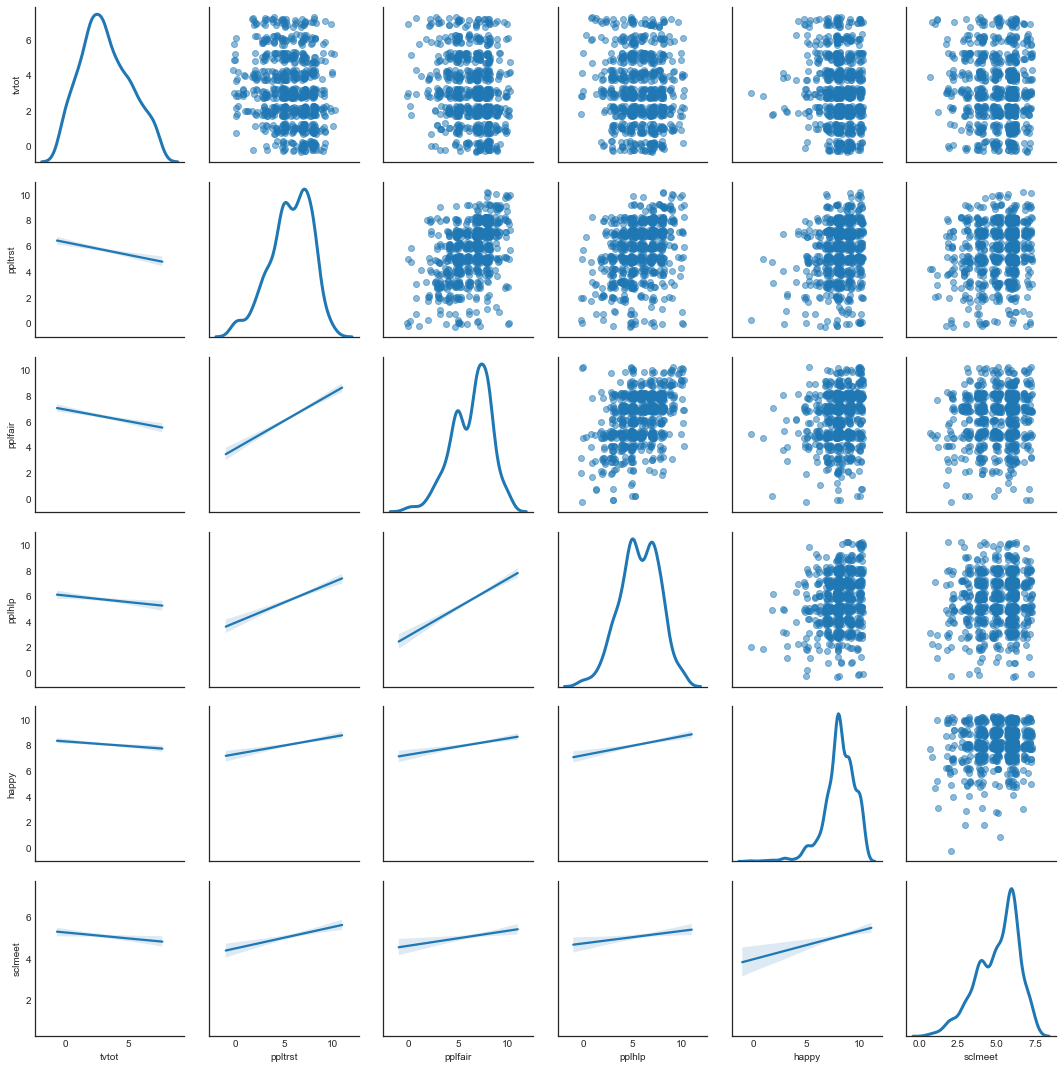

In [9]:
# make a scatterplot matrix

sns.set_style('white')

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

# take a subset of the data to make plots clearer

df_czech = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
    
]

# Adding jitter so we can see all points

df_jittered = df_czech.loc[:, 'tvtot':'sclmeet'].dropna()
# Making random noise

jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

# Combine the data and the noise

df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix

g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# Scatterplot 

g.map_upper(plt.scatter, alpha=.5)

# Fit Line summarizing the linear relationship of the two variables

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distribution of the variables

g.map_diag(sns.kdeplot, lw=3)
plt.show()

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


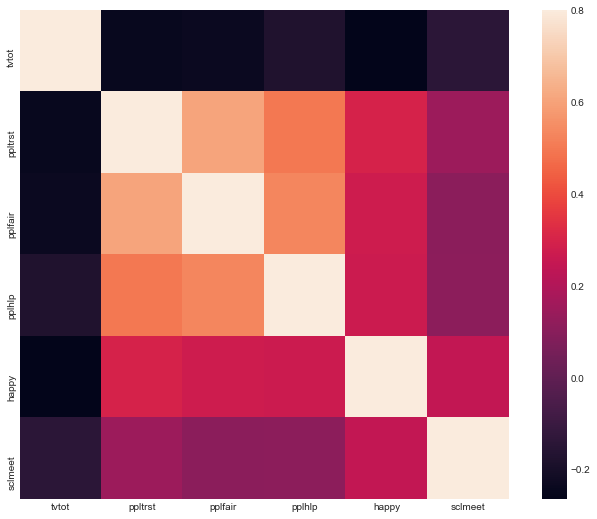

In [14]:
# Make the correlation matrix

corrmat = df_czech.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


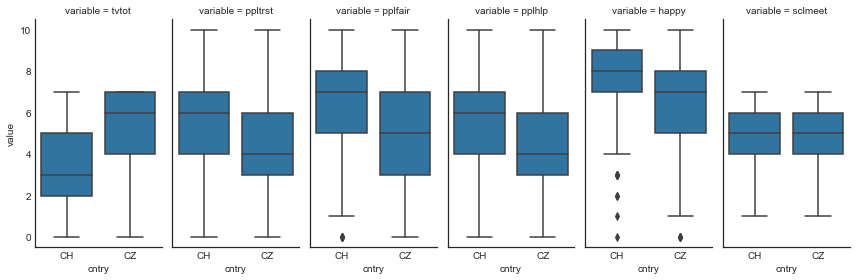

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]
tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.321576398582079e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.394029017549828e-27)
pplfair
Ttest_indRe

In [15]:
# Plot all the variables with boxplots for each country.

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_czech
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

# Descriptive statistics by group.
print(df_czech.groupby('cntry').describe())

# Test whether group differences are significant.
for col in df_czech.loc[:,'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czech[df_czech['cntry'] == 'CZ'][col].dropna(),
        df_czech[df_czech['cntry'] == 'CH'][col].dropna()
    ))

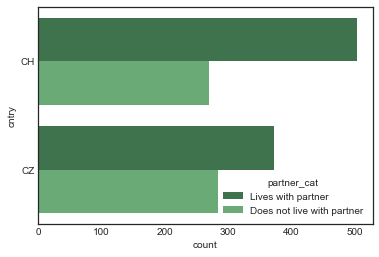

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.39958012596222, pvalue=9.236593586645439e-21)


In [16]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['cntry','partner']
]

# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

# Plot counts for each combination of levels.
sns.countplot(y="cntry", hue="partner_cat", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))